In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import pickle
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from collections import Counter
import nltk
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.metrics import classification_report , confusion_matrix , accuracy_score
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
from sklearn.metrics import precision_score, recall_score


%matplotlib inline
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

Importanto bibliotecas

In [ ]:
df = pd.read_csv('/content/data.csv')

Importando data

In [ ]:
def clean(text):
    port = PorterStemmer()
    stopword = nltk.corpus.stopwords.words('english')
    tokens = nltk.word_tokenize(text)
    lower = [word.lower() for word in tokens]
    no_stopwords = [word for word in lower if word not in stopword]
    no_alpha = [word for word in no_stopwords if word.isalpha()]
    lemm_text = [port.stem(word) for word in no_alpha]
    clean_text = lemm_text
    return ' '.join(word for word in clean_text)

Função para limpeza de texto

In [ ]:
clean_df = df
for i in range(len(df['Sentence'])):
    clean_df['Sentence'][i] = clean(df['Sentence'][i])

def show_cloud(sentiment):
    allwords = ' '.join(word for word in clean_df[clean_df['Sentiment'] == sentiment]['Sentence'])
    wordcloud = WordCloud(width=500, height=300, max_font_size=100, stopwords=stopwords.words('english')).generate(allwords)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Função para mostrar nuvem de palavras que mais aparecem em frases negativas, positivas e neutras.

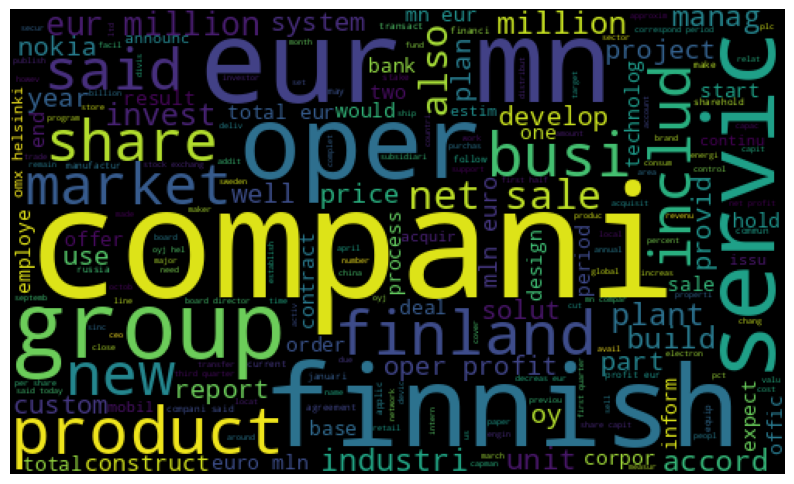

In [ ]:
show_cloud('neutral')

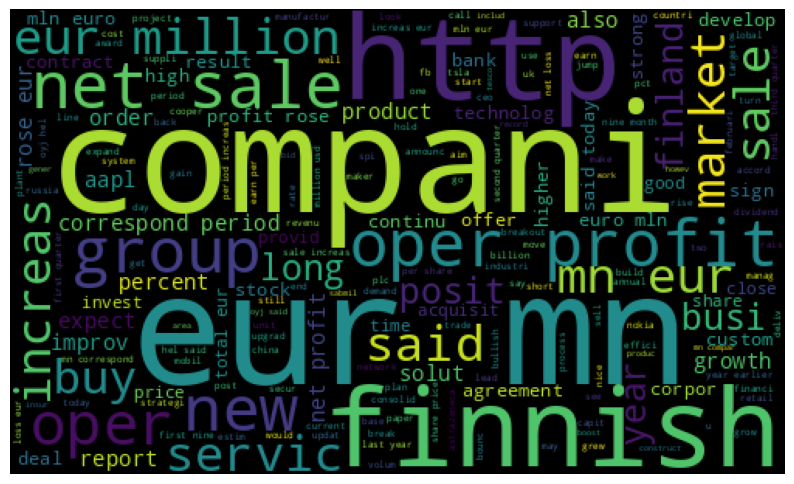

In [ ]:
show_cloud('positive')

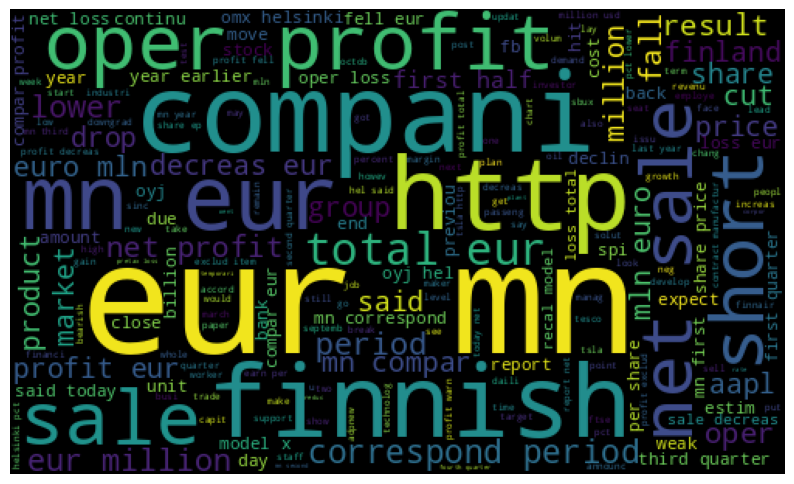

In [ ]:
show_cloud('negative')

In [ ]:
def extract_postags(text):
    tokens = nltk.word_tokenize(text)
    return [tag for word, tag in nltk.pos_tag(tokens)]

Função para extrair as postags do texto

In [ ]:
def join_postags(postags):
    return ' '.join(postags)
clean_df['postags'] = clean_df['Sentence'].apply(extract_postags)
clean_df['postags_str'] = clean_df['postags'].apply(join_postags)
clean_df['text_postags'] = clean_df['Sentence'] + ' ' + clean_df['postags_str']
clean_df['Sentiment'] = clean_df['Sentiment'].replace({'neutral': 0, 'positive': 1, 'negative': -1})
y = clean_df['Sentiment']
tfid = TfidfVectorizer()
X_final = tfid.fit_transform(clean_df['text_postags'])

Adicionando as postags a sentença e vetorizando tudo usando o TfidfVectorizer()

In [ ]:
smote = SMOTE()
x_sm,y_sm = smote.fit_resample(X_final,y)

smote = SMOTE(): Esta linha cria um objeto SMOTE (Synthetic Minority Over-sampling Technique). O SMOTE é uma técnica de reamostragem que gera exemplos sintéticos da classe minoritária para equilibrar o conjunto de dados.

x_sm, y_sm = smote.fit_resample(X_final, y): Esta linha aplica o método fit_resample do objeto SMOTE aos dados X_final e y. Isso resulta em um novo conjunto de dados (x_sm, y_sm) que é uma versão balanceada do conjunto de dados original.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3)
random_forest_classifier = RandomForestClassifier()
random_forest_classifier.fit(X_train,y_train.values.ravel())
y_pred = random_forest_classifier.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred, average='micro'), 3)
recall = round(recall_score(y_test, y_pred, average='micro'), 3)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)


Accuracy:  0.782
Precision:  0.782
Recall:  0.782


X_train , X_test , y_train , y_test = train_test_split(x_sm , y_sm , test_size=0.1,random_state=3): Esta linha divide o conjunto de dados balanceado (x_sm, y_sm) em conjuntos de treinamento e teste. O parâmetro test_size=0.1 indica que 10% dos dados serão usados para o conjunto de teste.

random_forest_classifier = RandomForestClassifier(): Esta linha cria um objeto RandomForestClassifier, que é um modelo de classificação baseado em árvores de decisão.

random_forest_classifier.fit(X_train,y_train.values.ravel()): Esta linha treina o modelo RandomForestClassifier usando o conjunto de treinamento.

y_pred = random_forest_classifier.predict(X_test): Esta linha usa o modelo treinado para prever os rótulos do conjunto de teste.

accuracy = round(accuracy_score(y_test, y_pred), 3): Esta linha calcula a acurácia do modelo.

precision = round(precision_score(y_test, y_pred, average='micro'), 3): Esta linha calcula a precisão do modelo.

recall = round(recall_score(y_test, y_pred, average='micro'), 3): Esta linha calcula o recall do modelo.

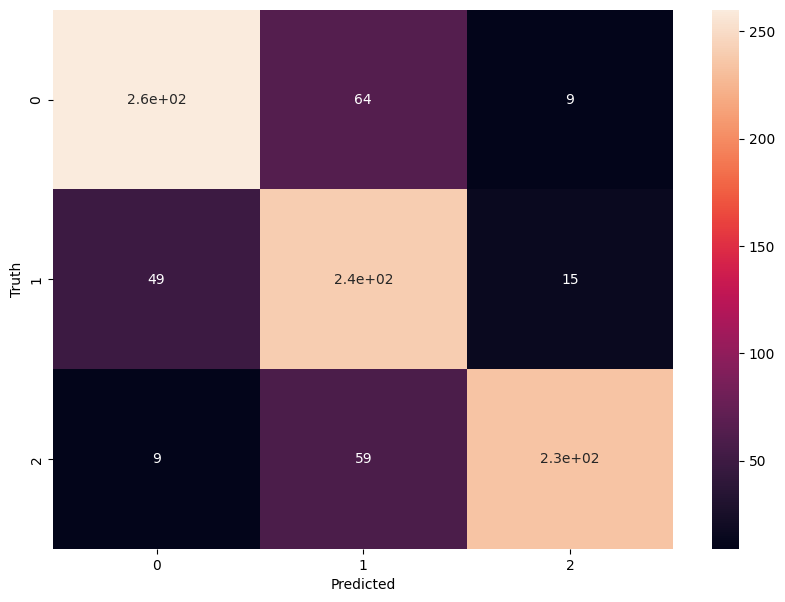

In [ ]:
y_pred = random_forest_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

y_pred = random_forest_classifier.predict(X_test): Esta linha usa o modelo random_forest_classifier para prever os rótulos do conjunto de teste X_test.

cm = confusion_matrix(y_test, y_pred): Esta linha calcula a matriz de confusão entre os rótulos verdadeiros y_test e os rótulos previstos y_pred usando a função confusion_matrix do sklearn.metrics.

plt.figure(figsize=(10,7)): Esta linha cria uma nova figura com um tamanho específico (10 por 7 polegadas) usando a biblioteca matplotlib.pyplot.

sns.heatmap(cm, annot=True): Esta linha cria um mapa de calor da matriz de confusão usando a biblioteca seaborn. O parâmetro annot=True significa que os valores da matriz de confusão serão escritos nas células do mapa de calor.

plt.xlabel('Predicted') e plt.ylabel('Truth'): Estas linhas definem os rótulos dos eixos x e y do gráfico, respectivamente.

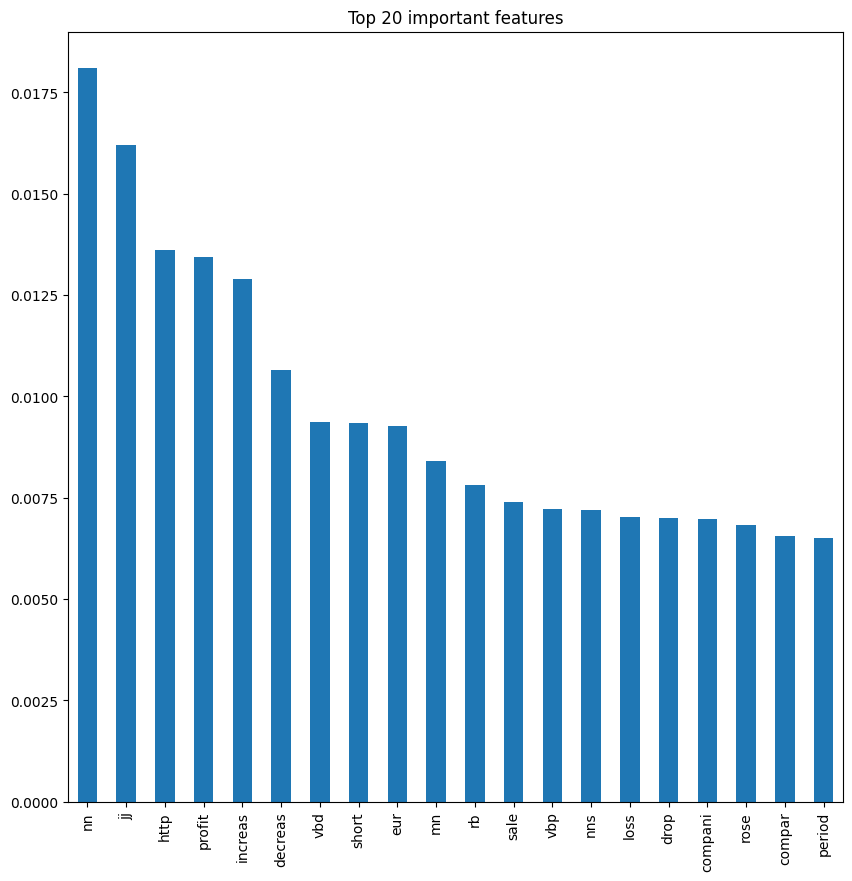

In [ ]:
feature_names = tfid.get_feature_names_out()
feat_importances = pd.Series(random_forest_classifier.feature_importances_, index=feature_names)
feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10))
plt.title("Top 20 important features")
plt.show()

feature_names = tfid.get_feature_names_out(): Esta linha obtém os nomes das características do vetorizador tfid. Os nomes das características são necessários para entender quais características são as mais importantes para o modelo.

feat_importances = pd.Series(random_forest_classifier.feature_importances_, index=feature_names): Esta linha cria uma série pandas onde o índice é o nome das características (feature_names) e os valores são a importância das características (random_forest_classifier.feature_importances_).

feat_importances.nlargest(20).plot(kind='bar',figsize=(10,10)): Esta linha seleciona as 20 características mais importantes e cria um gráfico de barras delas. O tamanho da figura é definido como 10 por 10 polegadas.

plt.title("Top 20 important features"): Esta linha define o título do gráfico como “Top 20 important features”.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(random_forest_classifier,X_train,y_train.values.ravel(),cv=5)

scores = cross_val_score(random_forest_classifier,X_train,y_train.values.ravel(),cv=5): Esta linha aplica a função cross_val_score ao modelo random_forest_classifier e aos dados de treinamento X_train e y_train. O parâmetro cv=5 indica que a validação cruzada deve ser realizada com 5 divisões dos dados. A função cross_val_score retorna uma lista de pontuações, uma para cada divisão dos dados.

In [ ]:
print(scores)
scores.mean()

[0.79538734 0.77810651 0.79349112 0.79053254 0.77810651]


0.7871248062313886

In [ ]:
def classify_text(text):
    clean_text = clean(text)
    postags = extract_postags(clean_text)
    postags_str = join_postags(postags)
    text_postags = clean_text + ' ' + postags_str
    X_final = tfid.transform([text_postags])
    prediction = random_forest_classifier.predict(X_final)
    return prediction

clean_text = clean(text): Esta linha limpa o texto de entrada usando a função clean. A função clean não é definida neste código, mas geralmente é usada para remover ruídos do texto, como caracteres especiais, números, pontuação, etc.

postags = extract_postags(clean_text): Esta linha extrai as tags de parte da fala (POS tags) do texto limpo usando a função extract_postags. As tags POS são úteis para entender o contexto gramatical em que uma palavra é usada.

postags_str = join_postags(postags): Esta linha junta as tags POS extraídas em uma única string usando a função join_postags.

text_postags = clean_text + ' ' + postags_str: Esta linha concatena o texto limpo e a string de tags POS para formar uma nova string.

X_final = tfid.transform([text_postags]): Esta linha transforma a string text_postags em um vetor de características usando o objeto tfid, que é presumivelmente um objeto TfidfVectorizer ou similar. Este vetor de características é usado como entrada para o modelo de classificação.

prediction = random_forest_classifier.predict(X_final): Esta linha usa o modelo random_forest_classifier para prever a classe do texto de entrada.

return prediction: Esta linha retorna a previsão do modelo.

In [ ]:
classify_text('The Swedish buyout company has successfully divested its remaining 22.4 percent stake, marking a major and significant milestone nearly eighteen months after taking the company public in Finland.')

array([0])